Use this notebook to introduce services to one another, so that they can trust each other

In [1]:
from Acquire.Client import User, Service, Authorisation

In [2]:
url = "http://fn.acquire-aaai.com:8080/t"

In [ ]:
identity_service = Service(service_url="%s/identity" % url)
print(identity_service)

In [ ]:
admin_identity = User("admin-%s" % identity_service.service_type(), identity_url=identity_service.canonical_url())
(login_url, qrcode) = admin_identity.request_login()
print(login_url)
qrcode

In [ ]:
admin_identity.wait_for_login()

In [3]:
accounting_service = Service(service_url="%s/accounting" % url)
print(accounting_service)

AccountingService(url=http://fn.acquire-aaai.com:8080/t/accounting, uid=ee005e09-c312-44be-bcce-08ac158a1234)


http://fn.acquire-aaai.com:8080/t/accounting/s?id=cc31993e


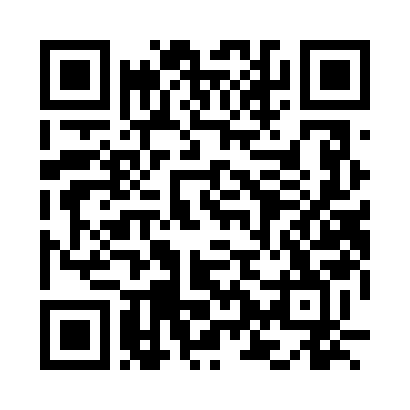

In [4]:
admin_accounting = User("admin-%s" % accounting_service.service_type(), identity_url=accounting_service.canonical_url())
(login_url, qrcode) = admin_accounting.request_login()
print(login_url)
qrcode

In [5]:
admin_accounting.wait_for_login()

True

In [6]:
access_service = Service(service_url="%s/access" % url)
print(access_service)

AccessService(url=http://fn.acquire-aaai.com:8080/t/access, uid=ab495477-5781-45f3-baef-1a17f62d4c56)


http://fn.acquire-aaai.com:8080/t/access/s?id=46d8f588


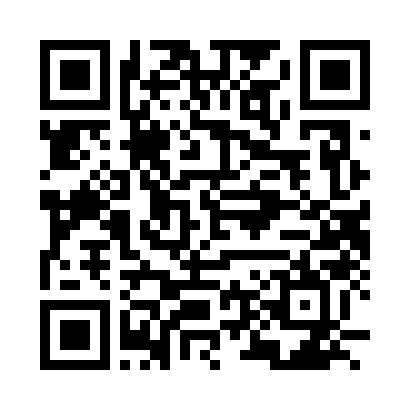

In [7]:
admin_access = User("admin-%s" % access_service.service_type(), identity_url=access_service.canonical_url())
(login_url, qrcode) = admin_access.request_login()
print(login_url)
qrcode

In [8]:
admin_access.wait_for_login()

True

In [ ]:
storage_service = Service(service_url="%s/storage" % url)
print(storage_service)

In [ ]:
admin_storage = User("admin-%s" % storage_service.service_type(), identity_url=storage_service.canonical_url())
(login_url, qrcode) = admin_storage.request_login()
print(login_url)
qrcode

In [ ]:
admin_storage.wait_for_login()

In [ ]:
resource = "trust_service %s" % identity_service.uid()
public_cert = identity_service.public_certificate().to_data()
args = {"service_url": identity_service.canonical_url(),
            "authorisation": Authorisation(user=admin_accounting,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [ ]:
response = accounting_service.call_function(
                    function="admin/trust_service", args=args)
print(response)

In [ ]:
resource = "trust_service %s" % identity_service.uid()
public_cert = identity_service.public_certificate().to_data()
args = {"service_url": identity_service.canonical_url(),
            "authorisation": Authorisation(user=admin_access,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [ ]:
response = access_service.call_function(
                    function="admin/trust_service", args=args)
print(response)

In [ ]:
resource = "trust_service %s" % identity_service.uid()
public_cert = identity_service.public_certificate().to_data()
args = {"service_url": identity_service.canonical_url(),
            "authorisation": Authorisation(user=admin_storage,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [ ]:
response = storage_service.call_function(
                    function="admin/trust_service", args=args)
print(response)

In [ ]:
resource = "trust_service %s" % access_service.uid()
public_cert = access_service.public_certificate().to_data()
args = {"service_url": access_service.canonical_url(),
            "authorisation": Authorisation(user=admin_accounting,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [ ]:
response = accounting_service.call_function(
                    function="admin/trust_service", args=args)
print(response)

In [ ]:
resource = "trust_service %s" % accounting_service.uid()
public_cert = accounting_service.public_certificate().to_data()
args = {"service_url": accounting_service.canonical_url(),
            "authorisation": Authorisation(user=admin_access,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [ ]:
response = access_service.call_function(
                    function="admin/trust_service", args=args)
print(response)

In [9]:
resource = "trust_accounting_service %s" % accounting_service.uid()
public_cert = accounting_service.public_certificate().to_data()
args = {"service_url": accounting_service.canonical_url(),
            "authorisation": Authorisation(user=admin_access,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [10]:
response = access_service.call_function(
                    function="admin/trust_accounting_service", args=args)
print(response)

OSError: Error calling 'admin/trust_accounting_service' on 'None': [Errno 25] Inappropriate ioctl for device

In [ ]:
admin_access.logout()
admin_accounting.logout()
admin_identity.logout()
admin_storage.logout()